# Libraries and Settings

In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Import Data

In [224]:
region = pd.read_csv('../data/ny_zip.csv',dtype={'zip':'object'})
ny_zip = region[['zip']]
zri = pd.read_csv('../data/ny_zri.csv',dtype={'zip':'object'})

In [814]:
zri

,zip,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,10025,2866.0,2828.0,2799.0,2791.0,2797.0,2823.0,2843.0,2858.0,2882.0,...,3467.0,3484.0,3523.0,3573.0,3622.0,3664.0,3698.0,3704.0,3692.0,3715.0
1,10023,2736.0,2675.0,2667.0,2680.0,2692.0,2707.0,2719.0,2738.0,2759.0,...,3457.0,3449.0,3459.0,3479.0,3491.0,3510.0,3521.0,3574.0,3608.0,3561.0
2,11226,1590.0,1570.0,1557.0,1549.0,1556.0,1578.0,1596.0,1600.0,1599.0,...,2018.0,2023.0,2028.0,2040.0,2054.0,2063.0,2073.0,2125.0,2098.0,2127.0
3,10467,1448.0,1443.0,1431.0,1425.0,1415.0,1405.0,1396.0,1379.0,1367.0,...,1777.0,1774.0,1778.0,1786.0,1792.0,1803.0,1818.0,1847.0,1861.0,1860.0
4,10016,2765.0,2692.0,2668.0,2669.0,2688.0,2709.0,2725.0,2749.0,2767.0,...,3503.0,3515.0,3529.0,3540.0,3543.0,3551.0,3569.0,3614.0,3576.0,3538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,11429,1457.0,1463.0,1464.0,1470.0,1466.0,1474.0,1484.0,1489.0,1495.0,...,2139.0,2118.0,2107.0,2102.0,2087.0,2074.0,2070.0,2090.0,2113.0,2111.0
134,10470,1541.0,1538.0,1531.0,1518.0,1493.0,1472.0,1455.0,1431.0,1416.0,...,1899.0,1909.0,1913.0,1914.0,1921.0,1927.0,1935.0,1934.0,1929.0,1934.0
135,10302,1362.0,1383.0,1397.0,1399.0,1386.0,1386.0,1391.0,1417.0,1447.0,...,1889.0,1882.0,1874.0,1869.0,1874.0,1895.0,1934.0,1982.0,1975.0,2010.0
136,11416,1517.0,1526.0,1532.0,1537.0,1540.0,1543.0,1554.0,1552.0,1551.0,...,2178.0,2179.0,2180.0,2183.0,2188.0,2189.0,2189.0,2200.0,2207.0,2211.0


In [140]:
data = []

import glob
files = glob.glob('../data/homezip*')

for i in range(len(files)):
    print('File: ',files[i])
    raw = pd.read_csv(files[i],
                   dtype={'yyyymm':'object','home_zip':'object','employer_cnt':'object','ee_cnt':'object'})
    print(np.sum(raw['home_zip'].isin(ny_zip['zip'])))
    data.append(ny_zip.merge(raw,how='left',left_on='zip',right_on='home_zip'))

File:  ../data/homezip-000000000001.csv
1386
File:  ../data/homezip-000000000000.csv
1455
File:  ../data/homezip-000000000002.csv
1465
File:  ../data/homezip-000000000003.csv
1421
File:  ../data/homezip-000000000007.csv
1457
File:  ../data/homezip-000000000012.csv
1542
File:  ../data/homezip-000000000006.csv
1454
File:  ../data/homezip-000000000010.csv
1420
File:  ../data/homezip-000000000004.csv
1485
File:  ../data/homezip-000000000005.csv
1434
File:  ../data/homezip-000000000011.csv
1496
File:  ../data/homezip-000000000008.csv
1376
File:  ../data/homezip-000000000009.csv
1447


In [207]:
spark = pd.concat(data)
spark.shape

(18838, 247)

# Data Cleaning

In [158]:
import seaborn as sns

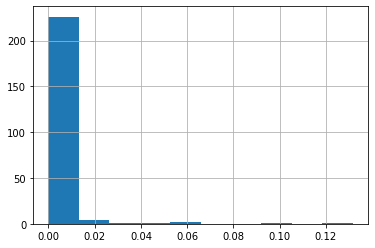

In [297]:
missing = spark.isna().mean(axis=0)
missing.hist(bins=10) 

In [209]:
spark = spark.loc[:,spark.columns[missing < 0.2]]

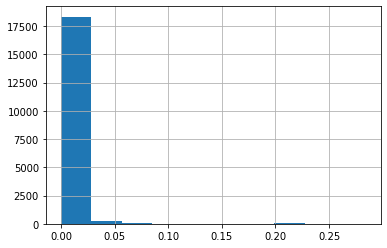

In [210]:
missing = spark.isna().mean(axis=1)
missing.hist(bins=10) 

In [211]:
for i in range(len(spark.columns)):
    print(spark.columns[i],spark.iloc[0,i])

zip 10025
yyyymm 201803
home_zip 10025
employer_cnt 2793
ee_cnt 9046
age_m 41.95
age_16_17_cnt 7.0
age_18_24_cnt 594.0
age_25_34_cnt 2866.0
age_35_54_cnt 3341.0
age_55_64_cnt 1281.0
age_65_p_cnt 664.0
age_nt_cnt 293.0
gender_cnt 9046.0
mle_cnt 4346.0
fem_cnt 4700.0
gender_nt_cnt 0.0
new_hire_fg_cnt 325.0
tenure_m 6.23
tenure_0_2yr_cnt 4654.0
tenure_3_7yr_cnt 2016.0
tenure_8yr_p_cnt 2323.0
rate_type_cnt 9046.0
rate_type_s_cnt 5646.0
rate_type_d_cnt 28.0
rate_type_hrly_cnt 3372.0
pay_freq_cnt 9046.0
pay_wkly_cnt 1533.0
pay_bw_cnt 3688.0
pay_sm_cnt 3330.0
pay_mthly_cnt 487.0
pay_d_cnt 7.0
pay_5pt2wks_cnt 0.0
pay_2pt6wks_cnt 0.0
pay_4wks_cnt 1.0
rate_amt_s_m 5754.15
rate_amt_s_sd 4848.38
rate_amt_s_10perc_value 1804.5
rate_amt_s_25perc_value 2705.75
rate_amt_s_50perc_value 4230.0
rate_amt_s_75perc_value 7307.0
rate_amt_s_90perc_value 11333.0
rate_amt_hrly_m 31.24
rate_amt_hrly_sd 29.35
rate_amt_hrly_10perc_value 13.0
rate_amt_hrly_25perc_value 14.0
rate_amt_hrly_50perc_value 22.0
rate_amt_

In [802]:
groupby = spark.groupby('zip')
for key, group in groupby:
    print(key,group.shape)

10001 (137, 236)
10003 (137, 236)
10005 (137, 236)
10009 (137, 236)
10010 (137, 236)
10011 (137, 236)
10012 (137, 236)
10013 (137, 236)
10014 (137, 236)
10016 (137, 236)
10017 (137, 236)
10018 (137, 236)
10019 (137, 236)
10021 (137, 236)
10022 (137, 236)
10023 (137, 236)
10024 (137, 236)
10025 (137, 236)
10027 (137, 236)
10028 (137, 236)
10029 (137, 236)
10031 (137, 236)
10036 (137, 236)
10038 (137, 236)
10065 (137, 236)
10075 (137, 236)
10128 (137, 236)
10301 (137, 236)
10302 (137, 236)
10303 (137, 236)
10304 (137, 236)
10305 (137, 236)
10306 (137, 236)
10308 (137, 236)
10310 (137, 236)
10312 (137, 236)
10314 (137, 236)
10453 (137, 236)
10456 (137, 236)
10457 (137, 236)
10458 (137, 236)
10459 (137, 236)
10460 (137, 236)
10461 (137, 236)
10462 (137, 236)
10463 (137, 236)
10465 (137, 236)
10466 (137, 236)
10467 (137, 236)
10469 (137, 236)
10470 (137, 236)
10472 (137, 236)
10473 (137, 236)
11101 (137, 236)
11102 (137, 236)
11103 (137, 236)
11104 (137, 236)
11105 (137, 236)
11106 (137, 23

In [803]:
comb = []

for key, group in groupby:
    if group.shape[0] == 137:
        zipcode = key
        
        spark_one = group.sort_values('yyyymm')
        spark_one['year'] = spark_one['yyyymm'].map(lambda t: int(t[:4]))
        spark_one['month'] = spark_one['yyyymm'].map(lambda t: int(t[-2:]))
        spark_one['yyyymm'] = spark_one['yyyymm'].map(lambda m: m[:4]+'-'+m[4:])
        spark_one = spark_one.drop(['home_zip'],axis=1).rename(columns={'yyyymm':'time'}).set_index(['time','zip'])
        spark_one = spark_one.astype({'employer_cnt':'float64','ee_cnt':'float64'})
        spark_one = spark_one.interpolate(method='linear',limit_direction='both', axis=0)

        zri_one = zri[zri['zip'] == zipcode].set_index('zip').T.reset_index()
        zri_one['zip'] = zipcode
        zri_one.columns = ['time','zri','zip']
        zri_one = zri_one.set_index(['time','zip'])

        comb_one = spark_one.merge(zri_one,left_on = ['time','zip'],right_on = ['time','zip'], how='inner')
        comb.append(comb_one)

In [804]:
full = pd.concat(comb,axis=0).sort_index()

In [813]:
full.to_csv('../data/ny_zri_adp.csv')

In [805]:
test = full.loc[(slice('2019-01','2019-09'),slice(None)),:]
train = full.loc[(slice('2018-12'),slice(None)),:]

In [806]:
X_train = train.iloc[:,:-1]
X_test = test.iloc[:,:-1]
y_train = train.iloc[:,-1]
y_test = test.iloc[:,-1]

# Normalization

Normalization is needed for regularized models like Ridge and Lasso.

In [407]:
from sklearn.preprocessing import StandardScaler

In [408]:
scl = StandardScaler()
scl = scl.fit(X_train)

In [409]:
X_train_scl = pd.DataFrame(scl.transform(X_train),columns=X_train.columns,index=X_train.index)
X_test_scl = pd.DataFrame(scl.transform(X_test),columns=X_test.columns,index=X_test.index)

# Build Models

## Linear Model

In [432]:
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance

In [421]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [688]:
evaluate(X_train,y_train,X_test,y_test,lm)

RMSE, train:  135.1616845017236
RMSE, test:  219.228800452233
R^2, train:  0.9601439436465362
R^2, test:  0.8690513862712224


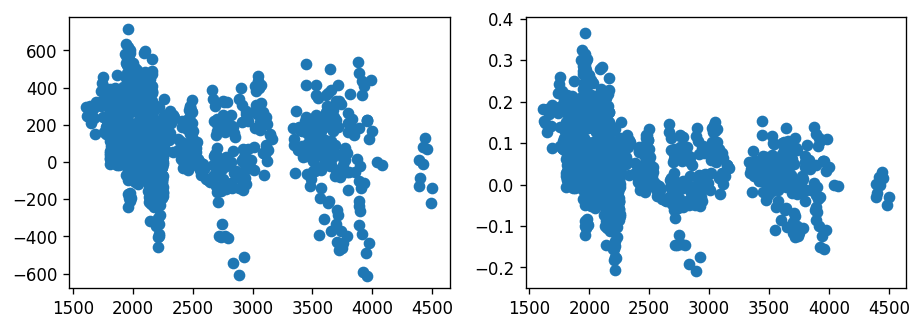

In [689]:
plot_residual(X_test,y_test,lm)

In [485]:
impt_lm = permutation_importance(lm, X_train, y_train, n_repeats=10,
                                random_state=42)

In [691]:
# perm_sorted_idx = impt_lm.importances_mean.argsort()[-10:]
# # plt.figure(figsize=(6,6))
# plt.boxplot(impt_lm.importances[perm_sorted_idx].T, vert=False,
#             labels=X_train.columns[perm_sorted_idx])
# # plt.title('Lasso Feature Importance')
# # plt.xlabel('R^2')
# # plt.savefig('../fig/lasso_top10.png')

In [690]:
get_importance(X_train.columns,impt_lm.importances_mean)

                          Feature  Importance
0                  marital_st_cnt   90.516184
1             ann_gross_pay_obs_m   34.072789
2       ann_gross_pay_obs_gen_y_m   19.817881
3      ann_gross_pay_proj_gen_y_m   17.915987
4      ann_gross_pay_proj_gen_x_m   13.367018
5                         sgl_cnt   12.487502
6       ann_gross_pay_obs_gen_x_m   10.433432
7                      pay_sm_cnt    8.300127
8  ann_gross_pay_proj_mle_gen_y_m    7.753396
9   ann_gross_pay_obs_mle_gen_y_m    7.524511


# Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

# Lasso

In [426]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

In [694]:
lasso = Lasso(max_iter=100000, alpha=0.1)

# alpha = 10**np.linspace(-8,0,50)
# alpha = [0.01]
# params = {'alpha': alpha}
# grid_search_lasso = GridSearchCV( estimator=lasso, param_grid=params )
# grid_search_lasso.fit(X_train_scl,y_train)

%time lasso.fit(X_train_scl,y_train)

CPU times: user 5min 41s, sys: 31.6 s, total: 6min 13s
Wall time: 3min 17s


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [695]:
evaluate(X_train_scl,y_train,X_test_scl,y_test,lasso)

RMSE, train:  140.48497163584582
RMSE, test:  264.1152212072807
R^2, train:  0.9569426924512857
R^2, test:  0.8099392006222075


GridSearchCV can't converge. Use lasso directly instead. It turns out using 0.01 will not converge.

- $\alpha = 1$:
 - R^2, train:  0.9459202937751144
 - R^2, test:  0.7787490839159582

- $\alpha = 0.1$:
 - R^2, train:  0.9569426924512857
 - R^2, test:  0.8099392006222075

# Gradient Boosting

In [696]:
from sklearn.ensemble import GradientBoostingRegressor

In [700]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [701]:
evaluate(X_train,y_train,X_test,y_test,gb)

RMSE, train:  105.16054091109544
RMSE, test:  150.69925574365362
R^2, train:  0.9758735871326745
R^2, test:  0.9381231915574698


In [697]:
estimator = GradientBoostingRegressor()

max_depth = [3]
n_estimators = [300]
learning_rate = [0.05]

params = {'max_depth':max_depth,'n_estimators':n_estimators,'learning_rate':learning_rate}
grid_search_gb= GridSearchCV( estimator=estimator, param_grid=params )
%time grid_search_gb.fit(X_train,y_train)

CPU times: user 17min 54s, sys: 2.75 s, total: 17min 57s
Wall time: 18min 8s


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [699]:
evaluate(X_train,y_train,X_test,y_test,grid_search_gb)

RMSE, train:  88.13558821197837
RMSE, test:  137.8811456424044
R^2, train:  0.983053120263371
R^2, test:  0.9482017059621521


In [702]:
get_importance(X_train.columns,grid_search_gb.best_estimator_.feature_importances_)

                          Feature  Importance
0  ann_gross_pay_proj_mle_gen_x_m    0.308105
1  ann_gross_pay_proj_mle_gen_y_m    0.121263
2      ann_gross_pay_proj_gen_x_m    0.075786
3         rate_amt_s_90perc_value    0.067935
4                     ann_bonus_m    0.065319
5    tenure_fem_ann_lvl_upr_mid_m    0.061531
6       ann_gross_pay_obs_gen_x_m    0.049392
7            tenure_ann_lvl_mid_m    0.023731
8                         reg_cnt    0.016404
9                    reg_temp_cnt    0.014046


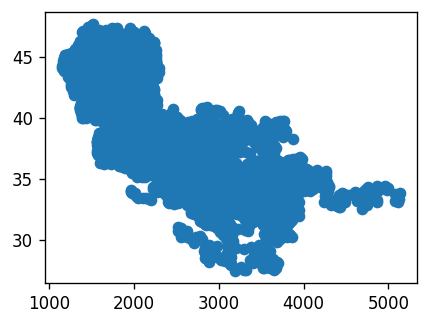

In [753]:
plt.figure(figsize=(4,3))
plt.scatter(y_train,X_train['age_ann_lvl_upr_mid_m'])

GridSearchCV uses 5 foled cross validation and refit using the best parameters. So it runs much slower. For now, we want to identify the most important features, not achieve the best fitting result, so GridSearchCV is not necessary.

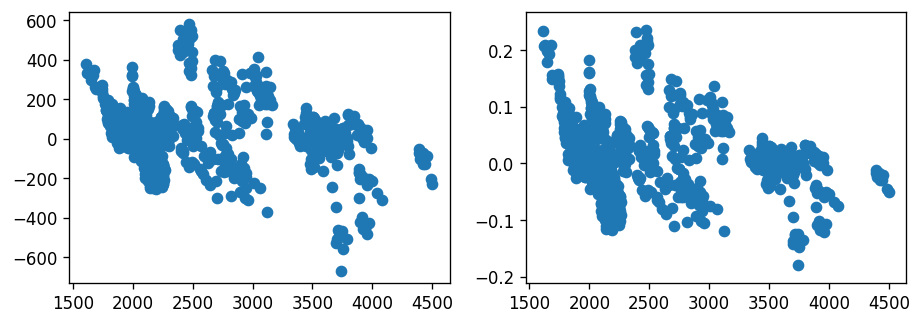

In [720]:
plot_residual(X_test,y_test,gb)

# Difference Among Boros

In [673]:
boros_gb = region.groupby('CountyName')

In [738]:
boros_gb.count()

,zip,RegionID,City,State,Metro,SizeRank
CountyName,,,,,,
Bronx County,15,15,15,15,15,15
Kings County,36,36,36,36,36,36
New York County,31,31,31,31,31,31
Queens County,46,46,46,46,46,46
Richmond County,10,10,10,10,10,10


In [674]:
def get_mask(boro_name):
    zipcodes = region.loc[boros_gb.groups[boro_name],'zip'].tolist()
    mask_train = X_train.index.map(lambda idx: idx[1] in zipcodes)
    mask_test = X_test.index.map(lambda idx: idx[1] in zipcodes)
    return(mask_train,mask_test)

In [675]:
def evaluate(data_X_train,data_y_train,data_X_test,data_y_test,model):
    rss = np.sum((data_y_train - model.predict(data_X_train))**2)
    print('RMSE, train: ',math.sqrt(rss/data_X_train.shape[0]))
    rss = np.sum((data_y_test-model.predict(data_X_test))**2)
    print('RMSE, test: ',math.sqrt(rss/data_X_test.shape[0]))

    print('R^2, train: ', model.score(data_X_train,data_y_train))
    print('R^2, test: ', model.score(data_X_test,data_y_test))

In [676]:
def get_importance(columns,importances,top=10):
    top_list = sorted(list(zip(columns, importances)), key = lambda x: x[1], reverse = True)[0:top]
    top_list = pd.DataFrame(top_list,columns=['Feature','Importance'])
    print(top_list)

In [727]:
def plot_residual(data_X,data_y,model,month=''):
    plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
    fig, (ax1,ax2) = plt.subplots(1, 2)
    if month:
        mask = data_y.index.map(lambda idx: idx[0] == month).tolist()
        ax1.scatter(data_y[mask],model.predict(data_X[mask])-data_y[mask])
        ax2.scatter(data_y[mask],(model.predict(data_X[mask])-data_y[mask])/data_y[mask])
    else:
        ax1.scatter(data_y,model.predict(data_X)-data_y)
        ax2.scatter(data_y,(model.predict(data_X)-data_y)/data_y)

## Manhattan

In [678]:
mask_manh_train, mask_manh_test = get_mask('New York County')

In [683]:
gb_manh = GradientBoostingRegressor()
gb_manh.fit(X_train[mask_manh_train],y_train[mask_manh_train])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [685]:
evaluate(X_train[mask_manh_train],y_train[mask_manh_train],
         X_test[mask_manh_test],y_test[mask_manh_test],gb_manh)

RMSE, train:  76.4021895686427
RMSE, test:  164.91953744522087
R^2, train:  0.9864212420728201
R^2, test:  0.9264008001630447


In [686]:
get_importance(X_train.columns,gb_manh.feature_importances_)

                         Feature  Importance
0          ann_gross_pay_proj_sd    0.312454
1             ann_net_pay_obs_sd    0.130398
2      ann_gross_pay_obs_gen_y_m    0.118347
3  ann_gross_pay_obs_mle_gen_y_m    0.047214
4                   reg_temp_cnt    0.046626
5            tenure_fem_gen_bb_m    0.027929
6        rate_amt_s_50perc_value    0.018517
7                    ann_bonus_m    0.016639
8             age_ann_lvl_high_m    0.016255
9                      gen_y_cnt    0.015210


Why ann_gross_pay_proj_sd and ann_net_pay_obs_sd? More features related to genenration Y?

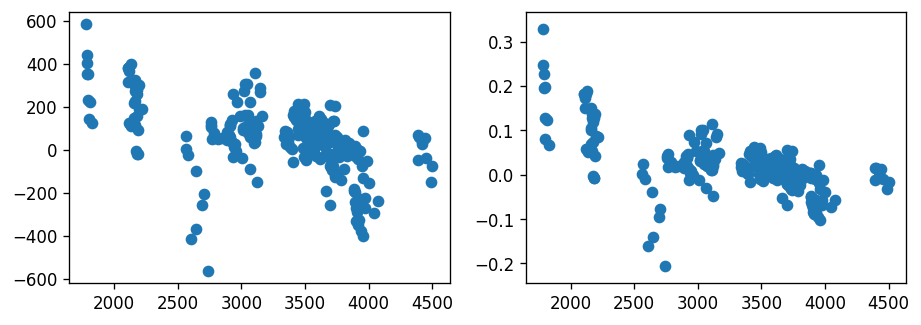

In [687]:
plot_residual(X_test[mask_manh_test],y_test[mask_manh_test],gb_manh)

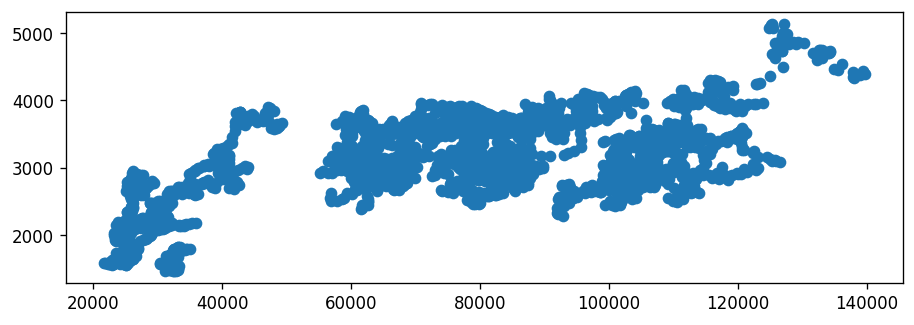

In [817]:
plt.scatter(X_train[mask_manh_train].ann_net_pay_obs_sd,y_train[mask_manh_train])

## Brooklyn

In [666]:
mask_brkn_train, mask_brkn_test = get_mask('Kings County')

In [667]:
gb_brkn = GradientBoostingRegressor()
%time gb_brkn.fit(X_train[mask_brkn_train],y_train[mask_brkn_train])

CPU times: user 17.7 s, sys: 70.7 ms, total: 17.8 s
Wall time: 17.9 s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [668]:
evaluate(X_train[mask_brkn_train],y_train[mask_brkn_train],
         X_test[mask_brkn_test],y_test[mask_brkn_test],gb_brkn)

RMSE, train:  42.56580845040956
RMSE, test:  84.45322709572531
R^2, train:  0.9874077114635095
R^2, test:  0.9121619794797482


Overfit? Let's use cross validation.

In [669]:
estimator = GradientBoostingRegressor()

max_depth = [3]
n_estimators = [100]
learning_rate = [0.1,0.05]
params = {'max_depth':max_depth,'n_estimators':n_estimators,'learning_rate':learning_rate}

grid_search_gb_brkn= GridSearchCV( estimator=estimator, param_grid=params )
%time grid_search_gb_brkn.fit(X_train[mask_brkn_train],y_train[mask_brkn_train])

CPU times: user 2min 39s, sys: 664 ms, total: 2min 40s
Wall time: 2min 43s


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
              

In [670]:
evaluate(X_train[mask_brkn_train],y_train[mask_brkn_train],
         X_test[mask_brkn_test],y_test[mask_brkn_test],grid_search_gb_brkn)

RMSE, train:  42.56580845040954
RMSE, test:  84.7388493067997
R^2, train:  0.9874077114635095
R^2, test:  0.9115668355084613


In [671]:
get_importance(X_train.columns,grid_search_gb_brkn.best_estimator_.feature_importances_)

                          Feature  Importance
0    tenure_fem_ann_lvl_upr_mid_m    0.438091
1        tenure_ann_lvl_upr_mid_m    0.144878
2                         reg_cnt    0.065398
3                        temp_cnt    0.037728
4                    reg_temp_cnt    0.030119
5          age_fem_ann_lvl_high_m    0.027264
6                  tenure_gen_y_m    0.022297
7  ann_gross_pay_proj_fem_gen_y_m    0.017968
8      ann_gross_pay_proj_gen_y_m    0.016897
9                 reg_temp_nt_cnt    0.016467


More features related to females?

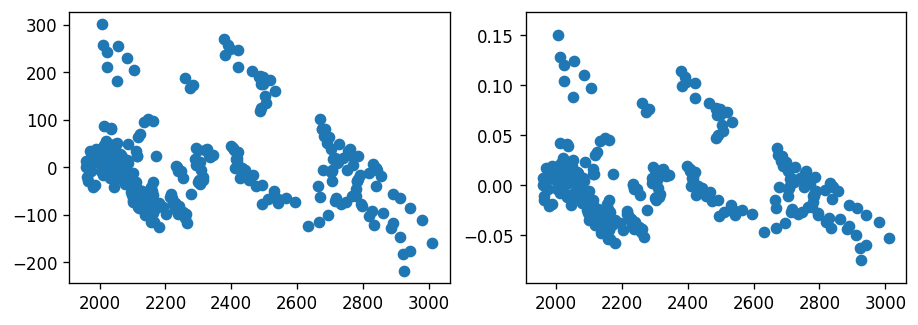

In [672]:
plot_residual(X_test[mask_brkn_test],y_test[mask_brkn_test],grid_search_gb_brkn)

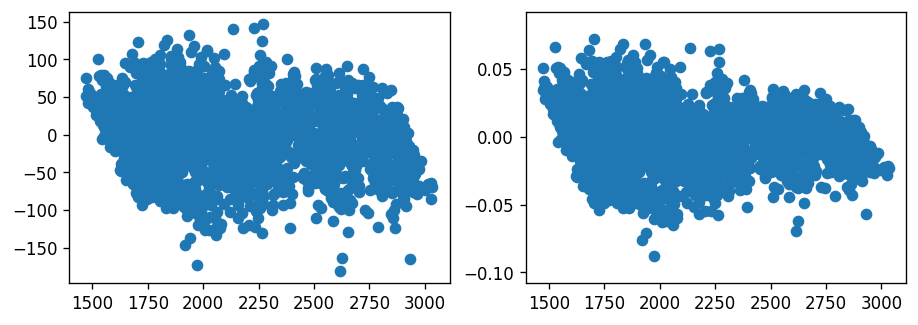

In [737]:
plot_residual(X_train[mask_brkn_train],y_train[mask_brkn_train],grid_search_gb_brkn)

## Queens

In [809]:
mask_quns_train,mask_quns_test = get_mask('Queens County')

In [810]:
gb_quns = GradientBoostingRegressor()
gb_quns.fit(X_train[mask_quns_train],y_train[mask_quns_train])

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [811]:
evaluate(X_train[mask_quns_train],y_train[mask_quns_train],
         X_test[mask_quns_test],y_test[mask_quns_test],gb_quns)

RMSE, train:  28.81681889508676
RMSE, test:  64.49684653744546
R^2, train:  0.9856747510777243
R^2, test:  0.4994464699622383


Overfit!

Try adding year and month as features.

In [812]:
X_train

employer_cnt  ee_cnt  age_m  age_16_17_cnt  age_18_24_cnt  \
time    zip                                                                
2011-01 10001        1231.0  2425.0  36.97            5.0          233.0   
        10003        2088.0  6049.0  36.56            2.0          371.0   
        10005         630.0  1288.0  33.40            1.0          106.0   
        10009        1989.0  5831.0  36.66            4.0          538.0   
        10010        1546.0  3832.0  36.38            4.0          222.0   
...                     ...     ...    ...            ...            ...   
2018-12 11435        1591.0  4538.0  40.59           13.0          544.0   
        11436         750.0  1750.0  40.62           11.0          243.0   
        11691        1079.0  3594.0  40.13           19.0          483.0   
        11692         667.0  1454.0  39.42            7.0          208.0   
        11694         641.0  1142.0  43.35            5.0          103.0   

               age_25_34_cnt  age_35_54_cnt  age_55_64_cnt  age_65_p_cnt  \
time    zip                                                                
2011-01 10001          902.0          713.0          185.0          64.0   
        10003         2694.0         1621.0          418.0         182.0   
        10005          656.0          335.0           39.0          13.0   
        10009         2334.0         1576.0          484.0         134.0   
        10010         1695.0         1038.0          232.0         124.0   
...                      ...            ...            ...           ...   
2018-12 11435         1199.0         1758.0          659.0         204.0   
        11436          409.0          693.0          286.0          63.0   
        11691          904.0         1423.0          501.0         146.0   
        11692          366.0          595.0          199.0          36.0   
        11694          266.0          431.0          215.0          77.0   

               age_nt_cnt  ...  age_mle_ann_lvl_six_fig_m  \
time    zip                ...                              
2011-01 10001       323.0  ...                      37.96   
        10003       761.0  ...                      38.43   
        10005       138.0  ...                      38.38   
        10009       761.0  ...                      39.53   
        10010       517.0  ...                      38.50   
...                   ...  ...                        ...   
2018-12 11435       161.0  ...                      44.01   
        11436        45.0  ...                      45.74   
        11691       118.0  ...                      45.74   
        11692        43.0  ...                      46.35   
        11694        45.0  ...                      50.65   

               age_fem_ann_lvl_six_fig_m  tenure_mle_m  tenure_fem_m  \
time    zip                                                            
2011-01 10001                      38.63          4.33          3.76   
        10003                      39.13          4.57          3.96   
        10005                      37.38          4.61          3.04   
        10009                      41.95          4.52          4.41   
        10010                      39.71          4.49          4.48   
...                                  ...           ...           ...   
2018-12 11435                      43.43          6.08          5.56   
        11436                      44.54          5.70          5.21   
        11691                      44.22          5.40          5.82   
        11692                      47.02          4.55          4.74   
        11694                      48.17          7.89          7.05   

               tenure_mle_hrly_m  tenure_mle_s_m  tenure_fem_hrly_m  \
time    zip                                                           
2011-01 10001               4.57            4.22               3.63   
        10003               4.49            4.59               3.70   
        10005         

## Bronx

In [636]:
mask_brnx_train, mask_brnx_test = get_mask('Bronx County')

In [637]:
gb_brnx = GradientBoostingRegressor()
%time gb_brnx.fit(X_train[mask_brnx_train],y_train[mask_brnx_train])

CPU times: user 7.4 s, sys: 50.7 ms, total: 7.45 s
Wall time: 7.56 s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [640]:
evaluate(X_train[mask_brnx_train],y_train[mask_brnx_train],
         X_test[mask_brnx_test],y_test[mask_brnx_test],gb_brnx)

RMSE, train:  16.5532079848682
RMSE, test:  63.03809376515686
R^2, train:  0.9898718666597421
R^2, test:  0.5222839939237047


Overfit? Let's use cross validation.

## Staten Island

In [645]:
mask_sttn_train, mask_sttn_test = get_mask('Richmond County')

In [646]:
gb_sttn = GradientBoostingRegressor()
%time gb_sttn.fit(X_train[mask_sttn_train],y_train[mask_sttn_train])

CPU times: user 4.71 s, sys: 23.3 ms, total: 4.73 s
Wall time: 4.76 s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [647]:
evaluate(X_train[mask_sttn_train],y_train[mask_sttn_train],
         X_test[mask_sttn_test],y_test[mask_sttn_test],gb_sttn)

RMSE, train:  24.15339623600213
RMSE, test:  92.30444754645931
R^2, train:  0.9894608749136901
R^2, test:  -1.4832791191570607


# PCA

## NYC

In [819]:
from sklearn.decomposition import PCA

In [891]:
n_components=8
pca_nyc = PCA(n_components=n_components)
adp_transformed = pca_nyc.fit_transform(X_train_scl)

Text(0, 0.5, 'Explained Variance Ratio')

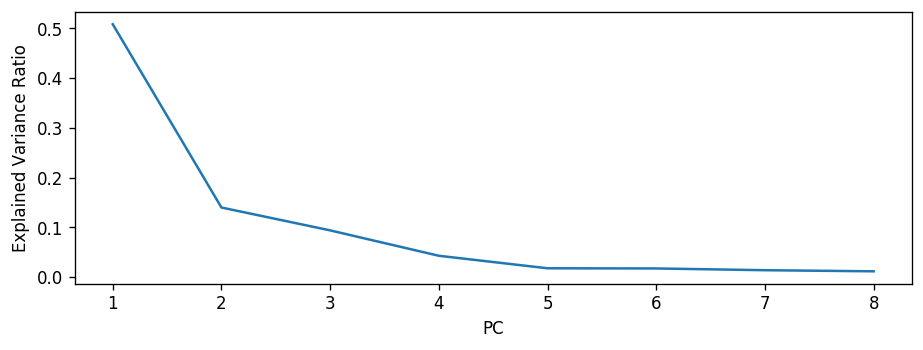

In [892]:
plt.plot(range(1,n_components+1),pca_nyc.explained_variance_ratio_)
plt.xlabel('PC')
plt.ylabel('Explained Variance Ratio')

In [868]:
colorCode = {'New York County':0,'Kings County':1, 'Queens County': 2, 'Bronx County': 3,
            'Richmond County':4}
color_list = X_train.reset_index()[['zip']].merge(region)['CountyName'].map(lambda name: colorCode[name])

Text(0, 0.5, '2nd PC')

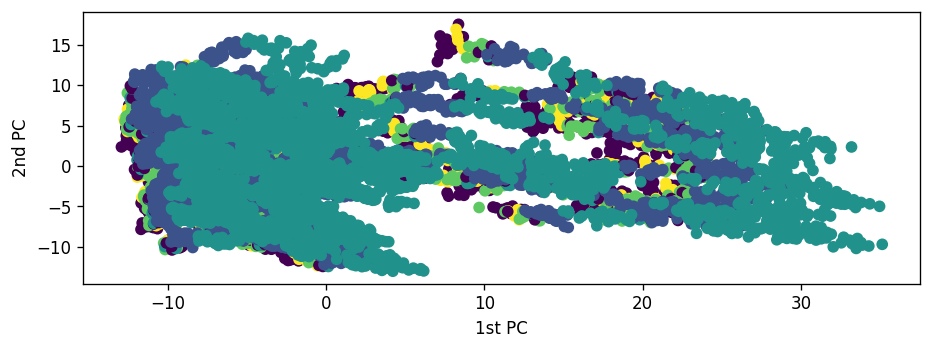

In [869]:
plt.scatter(x=adp_transformed[:,0], y=adp_transformed[:,1], c=color_list)
plt.xlabel('1st PC')
plt.ylabel('2nd PC')

PC is not seperating difference boros.

In [871]:
pca_comp = pd.DataFrame({'Feature':X_train_scl.columns,'PC1':pca_nyc.components_[0,:],'PC2':pca_nyc.components_[1,:],
                        'PC3':pca_nyc.components_[2,:],'PC4':pca_nyc.components_[3,:],'PC5':pca_nyc.components_[4,:]})

In [873]:
pca_comp.sort_values('PC1',ascending=False)

,Feature,PC1,PC2,PC3,PC4,PC5
84,ann_gross_pay_proj_m,0.091177,-0.011159,-0.011864,0.020389,0.014065
98,ann_net_pay_proj_m,0.090995,-0.010880,-0.011667,0.014098,0.015905
161,ann_gross_pay_proj_gen_x_m,0.090864,-0.008547,0.000305,0.015889,0.025049
123,ann_gross_pay_proj_mle_m,0.090840,-0.011661,-0.010501,0.027065,0.023570
124,ann_gross_pay_proj_fem_m,0.090767,-0.010421,-0.016880,0.010201,0.002073
...,...,...,...,...,...,...
220,age_fem_ann_lvl_upr_mid_m,-0.072373,-0.038391,-0.109291,0.023763,0.018206
199,tenure_fem_ann_lvl_mid_m,-0.072660,-0.034853,-0.085847,0.058678,0.029218
197,tenure_ann_lvl_mid_m,-0.073415,-0.026750,-0.084199,0.073203,-0.022971
200,tenure_ann_lvl_upr_mid_m,-0.074608,-0.037026,-0.098476,0.005193,0.034910


In [874]:
pca_comp.sort_values('PC2',ascending=False)

,Feature,PC1,PC2,PC3,PC4,PC5
62,sgl_cnt,0.019038,0.165292,-0.033280,-0.016373,0.030448
60,marital_st_cnt,0.015746,0.164269,-0.063883,-0.008449,-0.000501
1,ee_cnt,0.015748,0.164262,-0.063908,-0.008396,-0.000498
137,gen_cnt,0.015748,0.164262,-0.063908,-0.008396,-0.000498
10,gender_cnt,0.015748,0.164262,-0.063908,-0.008396,-0.000498
...,...,...,...,...,...,...
176,tenure_gen_y_m,0.023240,-0.072506,-0.120670,-0.128973,-0.088142
230,tenure_mle_s_m,-0.039869,-0.073273,-0.146058,0.017010,0.087523
15,tenure_m,-0.031198,-0.078798,-0.166301,0.054394,0.008180
207,tenure_mle_ann_lvl_six_fig_m,-0.029432,-0.079642,-0.131924,0.032437,0.093872


# Build a Model to Predict the Percentage Change

In [894]:
full.unstack()

employer_cnt                                                         \
zip            10001   10003  10005   10009   10010   10011   10012   10013   
time                                                                          
2011-01       1231.0  2088.0  630.0  1989.0  1546.0  2047.0  1189.0  1139.0   
2011-02       1235.0  2124.0  652.0  1992.0  1537.0  2071.0  1213.0  1141.0   
2011-03       1251.0  2136.0  663.0  2025.0  1560.0  2093.0  1214.0  1155.0   
2011-04       1269.0  2163.0  664.0  2056.0  1576.0  2117.0  1223.0  1174.0   
2011-05       1242.0  2109.0  651.0  2016.0  1541.0  2084.0  1184.0  1159.0   
...              ...     ...    ...     ...     ...     ...     ...     ...   
2019-05       1535.0  2191.0  775.0  2383.0  1561.0  2245.0  1227.0  1337.0   
2019-06       1530.0  2175.0  780.0  2366.0  1550.0  2210.0  1208.0  1321.0   
2019-07       1499.0  2184.0  780.0  2392.0  1535.0  2196.0  1226.0  1325.0   
2019-08       1441.0  2098.0  752.0  2290.0  1467.0  2109.0  1152.0  1258.0   
2019-09       1503.0  2132.0  765.0  2394.0  1511.0  2168.0  1215.0  1301.0   

                         ...     zri                                          \
zip       10014   10016  ...   11427   11429   11432   11433   11434   11435   
time                     ...                                                   
2011-01  1533.0  2309.0  ...  1456.0  1457.0  1481.0  1544.0  1543.0  1471.0   
2011-02  1548.0  2303.0  ...  1455.0  1463.0  1485.0  1545.0  1548.0  1472.0   
2011-03  1563.0  2317.0  ...  1451.0  1464.0  1485.0  1545.0  1549.0  1469.0   
2011-04  1581.0  2358.0  ...  1446.0  1470.0  1488.0  1544.0  1548.0  1471.0   
2011-05  1545.0  2289.0  ...  1440.0  1466.0  1486.0  1543.0  1540.0  1475.0   
...         ...     ...  ...     ...     ...     ...     ...     ...     ...   
2019-05  1628.0  2465.0  ...  2137.0  2107.0  2002.0  2199.0  2197.0  2011.0   
2019-06  1599.0  2442.0  ...  2130.0  2102.0  2003.0  2193.0  2193.0  2010.0   
2019-07  1601.0  2463.0  ...  2128.0  2087.0  2004.0  2183.0  2186.0  2006.0   
2019-08  1549.0  2381.0  ...  2126.0  2074.0  2004.0  2174.0  2175.0  2002.0   
2019-09  1590.0  2458.0  ...  2127.0  2070.0  2005.0  2173.0  2175.0  2000.0   

                                         
zip       11436   11691   11692   11694  
time                                     
2011-01  1489.0  1558.0  1532.0  1523.0  
2011-02  1498.0  1562.0  1531.0  1527.0  
2011-03  1497.0  1565.0  1526.0  1529.0  
2011-04  1495.0  1566.0  1526.0  1526.0  
2011-05  1489.0  1565.0  1521.0  1523.0  
...         ...     ...     ...     ...  
2019-05  2132.0  2198.0  2185.0  2162.0  
2019-06  2121.0  2193.0  2172.0  2162.0  
2019-07  2109.0  2187.0  2157.0  2161.0  
2019-08  2094.0  2181.0  2142.0  2158.0  
2019-09  2086.0  2185.0  2145.0  2159.0  

[105 rows x 32332 columns]